# Session 05 Logistic Regression | Exercise & Solution


[**CCMVI2085U Machine Learning for Predictive Analytics in Business @ CBS ISUP 2020**](https://kursuskatalog.cbs.dk/2019-2020/KAN-CCMVI2085U.aspx?lang=en-GB)

Course coordinator: [Bowei Chen](https://boweichen.github.io/) | Email: [bc.acc@cbs.dk](mailto:bc.acc@cbs.dk)

-----

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Fraud-detection-project" data-toc-modified-id="Fraud-detection-project-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fraud detection project</a></span></li><li><span><a href="#Load-data-and-perform-initial-check" data-toc-modified-id="Load-data-and-perform-initial-check-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data and perform initial check</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Feature-encoding" data-toc-modified-id="Feature-encoding-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature encoding</a></span></li><li><span><a href="#Training-and-test-data-split" data-toc-modified-id="Training-and-test-data-split-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Training and test data split</a></span></li></ul></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Logistic regression</a></span></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model evaluation</a></span></li></ul></div>

## Fraud detection project

Download **German_Credit.csv** to you computer. Our data is created based on the original data provided by Prof. Hofmann from Universität Hamburg. The data contains rows of 20 variables for 1000 past applicants for credit. These 20 variables represent the dataset's set of features (the feature vector), which provides identifying characteristics for each credit applicant. An additional column in each row represents the applicant's calculated credit risk, with 700 applicants identified as a low credit risk and 300 as a high risk. Full description about the data can be found here: https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)


**Source:**

Professor Dr. Hans Hofmann

Institut fur Statistik und Okonometrie 

Universitat Hamburg 

FB Wirtschaftswissenschaften 

Von-Melle-Park 5 

2000 Hamburg 13 


**Attribute information**

Attribute 1: (qualitative) 
Status of existing checking account 
A11 : ... < 0 DM 
A12 : 0 <= ... < 200 DM 
A13 : ... >= 200 DM / salary assignments for at least 1 year 
A14 : no checking account 

Attribute 2: (numerical) 
Duration in month 

Attribute 3: (qualitative) 
Credit history 
A30 : no credits taken/ all credits paid back duly 
A31 : all credits at this bank paid back duly 
A32 : existing credits paid back duly till now 
A33 : delay in paying off in the past 
A34 : critical account/ other credits existing (not at this bank) 

Attribute 4: (qualitative) 
Purpose 
A40 : car (new) 
A41 : car (used) 
A42 : furniture/equipment 
A43 : radio/television 
A44 : domestic appliances 
A45 : repairs 
A46 : education 
A47 : (vacation - does not exist?) 
A48 : retraining 
A49 : business 
A410 : others 

Attribute 5: (numerical) 
Credit amount 

Attibute 6: (qualitative) 
Savings account/bonds 
A61 : ... < 100 DM 
A62 : 100 <= ... < 500 DM 
A63 : 500 <= ... < 1000 DM 
A64 : .. >= 1000 DM 
A65 : unknown/ no savings account 

Attribute 7: (qualitative) 
Present employment since 
A71 : unemployed 
A72 : ... < 1 year 
A73 : 1 <= ... < 4 years 
A74 : 4 <= ... < 7 years 
A75 : .. >= 7 years 

Attribute 8: (numerical) 
Installment rate in percentage of disposable income 

Attribute 9: (qualitative) 
Personal status and sex 
A91 : male : divorced/separated 
A92 : female : divorced/separated/married 
A93 : male : single 
A94 : male : married/widowed 
A95 : female : single 

Attribute 10: (qualitative) 
Other debtors / guarantors 
A101 : none 
A102 : co-applicant 
A103 : guarantor 

Attribute 11: (numerical) 
Present residence since 

Attribute 12: (qualitative) 
Property 
A121 : real estate 
A122 : if not A121 : building society savings agreement/ life insurance 
A123 : if not A121/A122 : car or other, not in attribute 6 
A124 : unknown / no property 

Attribute 13: (numerical) 
Age in years 

Attribute 14: (qualitative) 
Other installment plans 
A141 : bank 
A142 : stores 
A143 : none 

Attribute 15: (qualitative) 
Housing 
A151 : rent 
A152 : own 
A153 : for free 

Attribute 16: (numerical) 
Number of existing credits at this bank 

Attribute 17: (qualitative) 
Job 
A171 : unemployed/ unskilled - non-resident 
A172 : unskilled - resident 
A173 : skilled employee / official 
A174 : management/ self-employed/ 
highly qualified employee/ officer 

Attribute 18: (numerical) 
Number of people being liable to provide maintenance for 

Attribute 19: (qualitative) 
Telephone 
A191 : none 
A192 : yes, registered under the customers name 

Attribute 20: (qualitative) 
foreign worker 
A201 : yes 
A202 : no 


**Response variable information**

(1 = Good, 2 = Bad)


## Load data and perform initial check

Q1. Import the dataset into your Jupyter notebook as `df`

In [13]:
import pandas as pd
df = pd.read_csv("German_Credit.csv", header=None)

Q2. Check the first 5 rows the dataset 

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Q3. Check the dimension of data

In [10]:
df.shape

(1000, 21)

Q4. Show varaiable types

In [12]:
df.dtypes

0     object
1      int64
2     object
3     object
4      int64
5     object
6     object
7      int64
8     object
9     object
10     int64
11    object
12     int64
13    object
14    object
15     int64
16    object
17     int64
18    object
19    object
20     int64
dtype: object

Q6. 

In the UCI data scription, we know the following variables represent the columns (same sequence) in the dataset, please assign these variable names to the columns in your imported dataset and show the header:

Status of checking account, Duration in months, Credit history, Purpose, Credit amount, Savings account/bond, Present employment since, Installment rate in percentage of disposable income, Personal status and sex, Other debtors, Present residence since, Property, Age in years, Other installment plans, Housing, Number of existing credits, Job, Number of people providing maintenance for, Telephone, Foreign worker, Credit risk

In [16]:
df.columns = [
    "Status of checking account",
    "Duration in months",
    "Credit history",
    "Purpose",
    "Credit amount",
    "Savings account/bond",
    "Present employment since",
    "Installment rate in percentage of disposable income",
    "Personal status and sex",
    "Other debtors",
    "Present residence since",
    "Property",
    "Age in years",
    "Other installment plans",
    "Housing",
    "Number of existing credits",
    "Job",
    "Number of people providing maintenance for",
    "Telephone",
    "Foreign worker",
    "Credit risk",
]

df.head()

,Status of checking account,Duration in months,Credit history,Purpose,Credit amount,Savings account/bond,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits,Job,Number of people providing maintenance for,Telephone,Foreign worker,Credit risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Q7. Show the unique values of the variables which are shown as `object` in your data initial check. 

In [9]:
for col in df.select_dtypes(include="object").columns:
    print("{0}: {1}".format(col, df[col].unique()))

Status of checking account: ['A11' 'A12' 'A14' 'A13']
Credit history: ['A34' 'A32' 'A33' 'A30' 'A31']
Purpose: ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
Savings account/bond: ['A65' 'A61' 'A63' 'A64' 'A62']
Present employment since: ['A75' 'A73' 'A74' 'A71' 'A72']
Personal status and sex: ['A93' 'A92' 'A91' 'A94']
Other debtors: ['A101' 'A103' 'A102']
Property: ['A121' 'A122' 'A124' 'A123']
Other installment plans: ['A143' 'A141' 'A142']
Housing: ['A152' 'A153' 'A151']
Job: ['A173' 'A172' 'A174' 'A171']
Telephone: ['A192' 'A191']
Foreign worker: ['A201' 'A202']


Q8. Show pairwise plot of the numerical variables

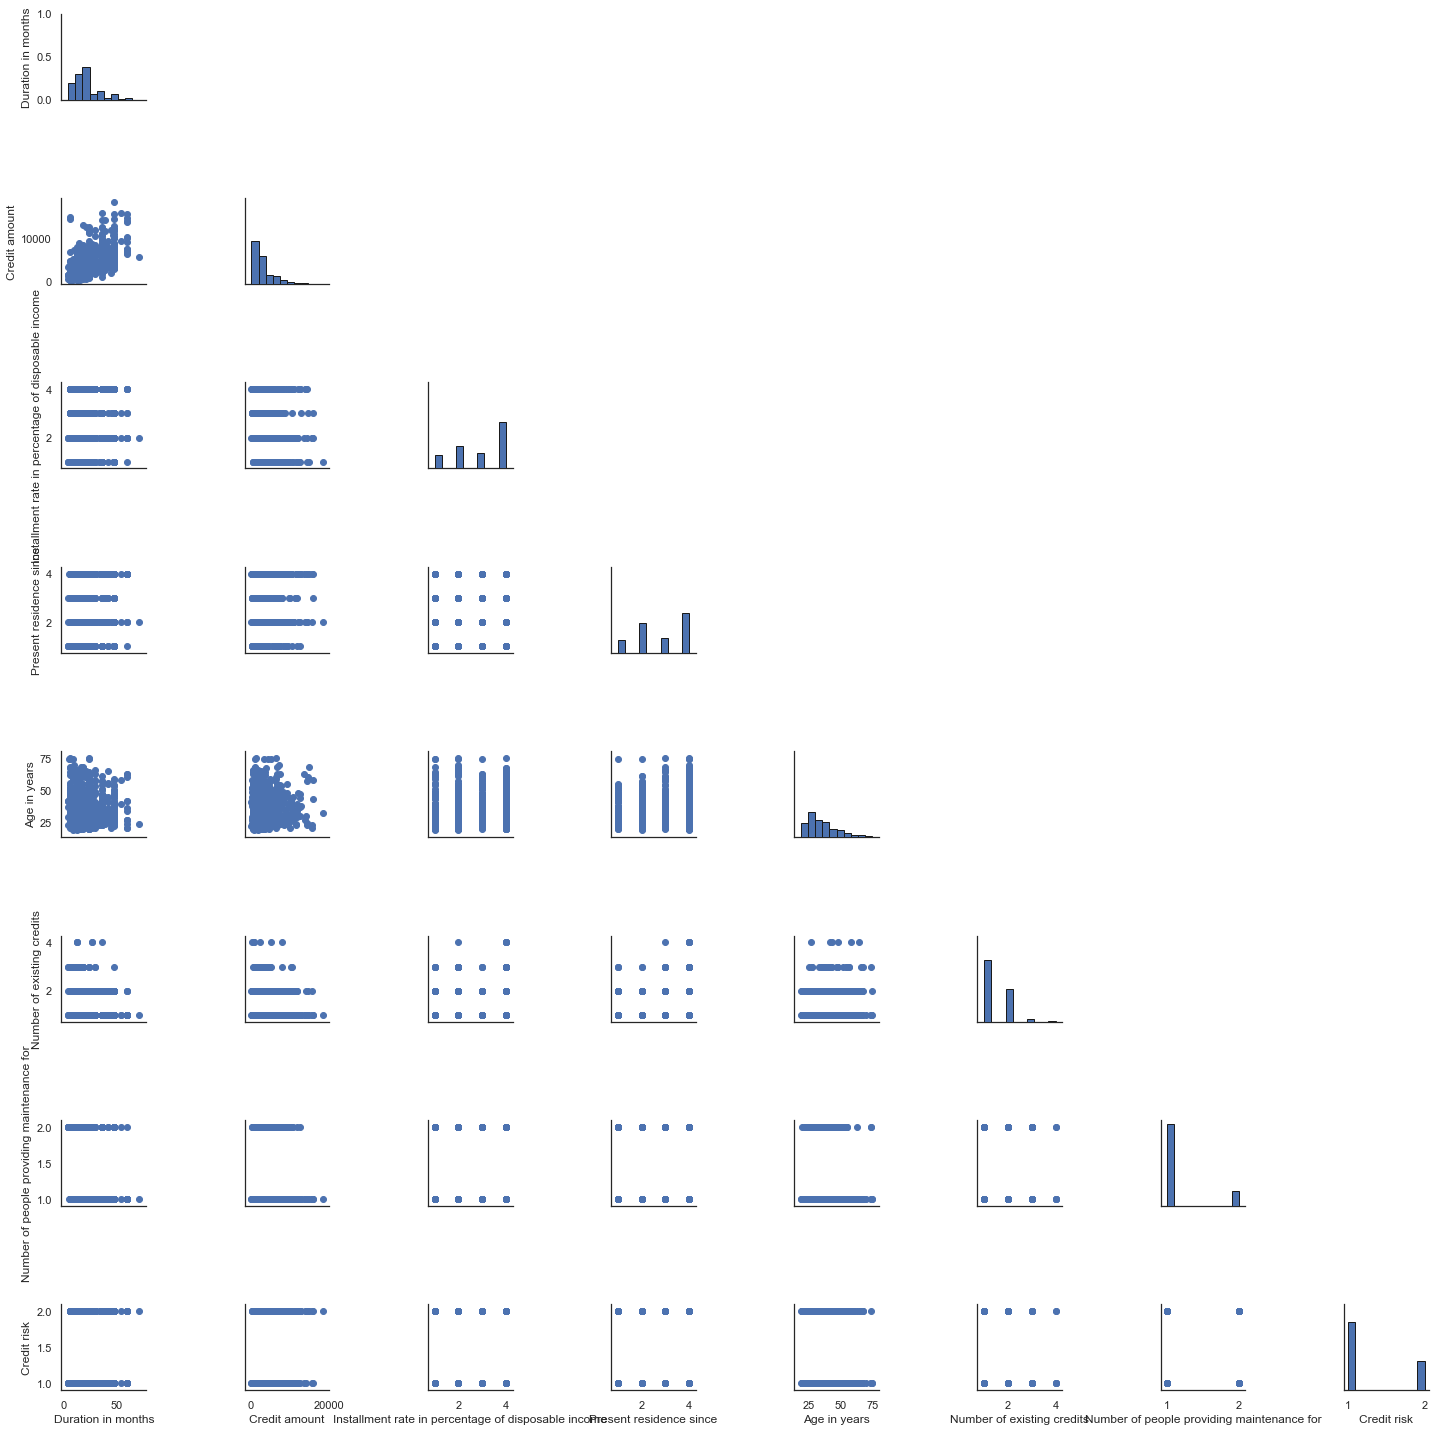

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set(style="white")

# Create an instance of the PairGrid class.
g = sns.PairGrid(data= df)

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)

# Map the plots to the locations
g.map_lower(plt.scatter)
g.map_upper(hide_current_axis)
g.map_diag(plt.hist, bins = 10, edgecolor =  'k');
plt.show()

Q9. Do you think all numerical variables' data types are correct? If not, please change those numerical variables into categorical

In [21]:
for col in df.select_dtypes(include="int64"):
    print("{0}: {1}".format(col, df[col].unique()))
    if len(df[col].unique()) <= 5:
        df[col] = df[col].astype(object)

Duration in months: [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
Credit amount: [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6078  7721  1410
  1449   392  6260  7855  1680  3578  7174  2132  4281  2366  1835  3868
  1768   781  1924  2121   701   639  1860  3499  8487  6887  2708  1984
 10144  1240  8613   766  2728  1881   709  4795  3416  2462

In [23]:
df.dtypes

Status of checking account                             object
Duration in months                                      int64
Credit history                                         object
Purpose                                                object
Credit amount                                           int64
Savings account/bond                                   object
Present employment since                               object
Installment rate in percentage of disposable income    object
Personal status and sex                                object
Other debtors                                          object
Present residence since                                object
Property                                               object
Age in years                                            int64
Other installment plans                                object
Housing                                                object
Number of existing credits                             object
Job     

Q10. Do you think if the positive and negative sampels in the traget variable are balanced?

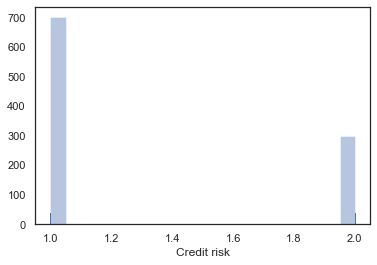

In [14]:
import seaborn as sns
sns.distplot(df["Credit risk"], bins=20, kde=False, rug=True)

## Data preparation

### Feature encoding 

We can use `pandas.get_dummies` to encode category features and response variable 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [26]:
df2 = pd.get_dummies(df, drop_first=True)
df2.head()

,Duration in months,Credit amount,Age in years,Status of checking account_A12,Status of checking account_A13,Status of checking account_A14,Credit history_A31,Credit history_A32,Credit history_A33,Credit history_A34,...,Number of existing credits_2,Number of existing credits_3,Number of existing credits_4,Job_A172,Job_A173,Job_A174,Number of people providing maintenance for_2,Telephone_A192,Foreign worker_A202,Credit risk_2
0,6,1169,67,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,48,5951,22,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,12,2096,49,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,42,7882,45,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,24,4870,53,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1


In [33]:
x = df2.iloc[:, :-1].to_numpy()
y = df2.iloc[:, -1].to_numpy()

print(x)
print(y)

[[   6 1169   67 ...    0    1    0]
 [  48 5951   22 ...    0    0    0]
 [  12 2096   49 ...    1    0    0]
 ...
 [  12  804   38 ...    0    0    0]
 [  45 1845   23 ...    0    1    0]
 [  45 4576   27 ...    0    0    0]]
[0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1
 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 1 0 0

Alternatively, we can use `OneHotEncoder` from `sklearn` to encode categorical features. 

In [18]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop="first")

In [19]:
x_transform = enc.fit_transform(df.select_dtypes(include="object")).toarray()
print(x_transform)
print("----------------\n")
print(enc.categories_)
print("----------------\n")
print(enc.get_feature_names())

[[0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]
----------------

[array(['A11', 'A12', 'A13', 'A14'], dtype=object), array(['A30', 'A31', 'A32', 'A33', 'A34'], dtype=object), array(['A40', 'A41', 'A410', 'A42', 'A43', 'A44', 'A45', 'A46', 'A48',
       'A49'], dtype=object), array(['A61', 'A62', 'A63', 'A64', 'A65'], dtype=object), array(['A71', 'A72', 'A73', 'A74', 'A75'], dtype=object), array([1, 2, 3, 4], dtype=object), array(['A91', 'A92', 'A93', 'A94'], dtype=object), array(['A101', 'A102', 'A103'], dtype=object), array([1, 2, 3, 4], dtype=object), array(['A121', 'A122', 'A123', 'A124'], dtype=object), array(['A141', 'A142', 'A143'], dtype=object), array(['A151', 'A152', 'A153'], dtype=object), array([1, 2, 3, 4], dtype=object), array(['A171', 'A172', 'A173', 'A174'], dtype=object), array([1, 2], dtype=object), array(['A191', 'A192'], dtype=object), array(['A201', 'A202'], 

In [20]:
df_enc = pd.DataFrame(x_transform, columns=enc.get_feature_names())
df_enc.head()

,x0_A12,x0_A13,x0_A14,x1_A31,x1_A32,x1_A33,x1_A34,x2_A41,x2_A410,x2_A42,...,x12_2,x12_3,x12_4,x13_A172,x13_A173,x13_A174,x14_2,x15_A192,x16_A202,x17_2
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [34]:
df_sklearn = pd.concat(
    [df.select_dtypes(include="int64"), df_enc], axis=1, ignore_index=False
)
df_sklearn.head()

NameError: name 'df_enc' is not defined

In [22]:
x_2 = df_sklearn.iloc[:,:-1].to_numpy()
y_2 = df_sklearn.iloc[:,-1].to_numpy()

print(x_2)
print(y_2)

[[6.000e+00 1.169e+03 6.700e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [4.800e+01 5.951e+03 2.200e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.200e+01 2.096e+03 4.900e+01 ... 1.000e+00 0.000e+00 0.000e+00]
 ...
 [1.200e+01 8.040e+02 3.800e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [4.500e+01 1.845e+03 2.300e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [4.500e+01 4.576e+03 2.700e+01 ... 0.000e+00 0.000e+00 0.000e+00]]
[0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1

### Training and test data split

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)

## Logistic regression 

Use the following code to import the logistic regression model from `sklearn` and create a logistic regression model

In [37]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=4, solver="liblinear")
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=4, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

The following are the useful built-in functions with logistic regression

| Function   | Description       |
|------------------------------|--------------------------------------------------------------|
| fit(X,y[,sample_weight])   | Fit the model according to the given training data.          |
| fit_transform(X[,y])        | Fit to data, then transform it.                              |
| get_params()           | Get parameters for this estimator.                           |
| predict(X)                   | Predict class labels for samples in X.                       |
| predict_proba(X)             | Probability estimates.                                       |
| score(X,y[,sample_weight]) | Returns the mean accuracy on the given test data and labels. |
| set_params(**params)         | Set the parameters of this estimator.                        |


In logistic regression, some important parameters settings are here:

- penalty : str, ‘l1’ or ‘l2’: bUsed to specify the norm used in the penalization. 

    The newton-cg and lbfgs solvers support only l2 penalties.

- fit_intercept : bool, default: True 

    Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.

- max_iter : int 

    Useful only for the newton-cg, sag and lbfgs solvers. Maximum number of iterations taken for the solvers to converge.

- random_state : int seed, RandomState instance, or None (default) 

    The seed of the pseudo random number generator to use when shuffling the data.

- solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’}

    Algorithm to use in the optimization problem.

    For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ is faster for large ones.

    For multiclass problems, only ‘newton-cg’ and ‘lbfgs’ handle multinomial loss; ‘sag’ and ‘liblinear’ are limited to one-versus-rest schemes.

    ‘newton-cg’, ‘lbfgs’ and ‘sag’ only handle L2 penalty.

    Note that ‘sag’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

    New in version 0.17: Stochastic Average Gradient descent solver.

- tol : float, optional (Tolerance for stopping criteria.)

- multi_class : str, {‘ovr’, ‘multinomial’}

    Multiclass option can be either ‘ovr’ or ‘multinomial’. If the option chosen is ‘ovr’, then a binary problem is fit for each label. Else the loss minimised is the multinomial loss fit across the entire probability distribution. Works only for the ‘lbfgs’ solver.

## Model evaluation 

Now you are going to evaluate your model's performance. 

1. Make predictions with both the training data and the test data.

2. Create two data frames. Each data frame has three columns:
    - Label_GT (ground truth in the dataset)
    - Label_Pred_Prob (probability of your model prediction)
    - Label_Pred (your model predicted label)

3. Use `confusion_matrix` to calculate the TP, FP, TN, FN of both the training data and the test data.

4. Use the following function `plot_confusion_matrix` to plot a confusion matrix of both the training and the test data.

5. Calculate the related evaluation metrics (accuracy, recall, precision) for both the training and the test data.

6. Use `roc_curve` and `auc` from `sklearn.metrics` to calculate the AUC of your model performance in the test data, and define a function to draw a ROC graph of your model

In [39]:
y_pred_label_train = clf.predict(x_train)
y_pred_label_prob_train = clf.predict_proba(x_train)[:, 1]

y_pred_label_test = clf.predict(x_test)
y_pred_label_prob_test = clf.predict_proba(x_test)[:, 1]

In [40]:
dfResultTrain = pd.DataFrame([y_train, y_pred_label_prob_train, y_pred_label_train])
dfResultTrain = dfResultTrain.T
dfResultTrain.columns = ["Label_GT", "Label_Pred_Prob", "Label_Pred"]
dfResultTrain.head()

,Label_GT,Label_Pred_Prob,Label_Pred
0,1.0,0.464801,0.0
1,1.0,0.160823,0.0
2,1.0,0.733888,1.0
3,0.0,0.034688,0.0
4,0.0,0.181275,0.0


In [41]:
dfResultTest = pd.DataFrame([y_test, y_pred_label_prob_test, y_pred_label_test])
dfResultTest = dfResultTest.T
dfResultTest.columns = ["Label_GT", "Label_Pred_Prob", "Label_Pred"]
dfResultTest.head()

,Label_GT,Label_Pred_Prob,Label_Pred
0,0.0,0.057244,0.0
1,0.0,0.170192,0.0
2,1.0,0.074630,0.0
3,1.0,0.370532,0.0
4,0.0,0.153102,0.0


In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_label_test)

array([[243,  31],
       [ 73,  53]])

In [44]:
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(
    y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = "Normalized confusion matrix"
        else:
            title = "Confusion matrix, without normalization"

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    # print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation="nearest", cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes,
        yticklabels=classes,
        title=title,
        ylabel="True label",
        xlabel="Predicted label",
    )

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(
                j,
                i,
                format(cm[i, j], fmt),
                ha="center",
                va="center",
                color="white" if cm[i, j] > thresh else "black",
            )
    plt.grid(b=None)
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

Confusion matrix, without normalization


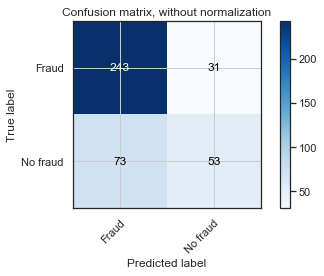

In [52]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(
    y_test, y_pred_label_test, classes=np.array(["Fraud", "No fraud"])
)

In [91]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("\033[4mCompute evaluation metrics (training)\033[0m",
      "Average accuracy: %0.4f" % clf.score(x_train, y_train),
      "Average recall: %0.4f" % recall_score(y_train, y_pred_label_train, average="macro"),
      "Average precision: %0.4f" % precision_score(y_train, y_pred_label_train, average="macro"),
      "\n\033[4mCompute evaluation metrics (test)\033[0m",
      "Average accuracy: %0.4f" % clf.score(x_test, y_test),
      "Average recall: %0.4f" % recall_score(y_test, y_pred_label_test, average="macro"),
      "Average precision: %0.4f" % precision_score(y_test, y_pred_label_test, average="macro"),
      sep="\n"
)

Compute evaluation metrics (training)
Average accuracy: 0.7950
Average recall: 0.7111
Average precision: 0.7605

Compute evaluation metrics (test)
Average accuracy: 0.7400
Average recall: 0.6537
Average precision: 0.7000


In [54]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_label_prob_test)
roc_auc = auc(fpr, tpr)

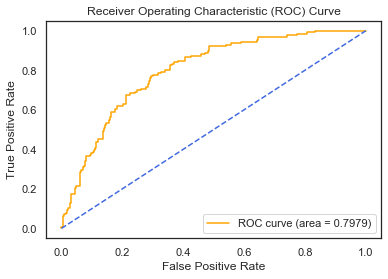

In [55]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="Orange", label="ROC curve (area = %0.4f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color="RoyalBlue", linestyle="--")
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(fpr, tpr)